
# **An analysis of financial inclusion in East Africa**

**Background Reasearch**

Financial Inclusions remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account. The main financial inclusion determinants factors are age, gender, income level of an individual, education level, formal account and savings.Income level of an individual plays a greater role in determining one’s financial inclusion. More richer individuals are more likely to be financially included than those with low income. Education is positively associated with all indicators of financial inclusion according to a world bank report. The higher the education level of an individual the higher the financial inclusion. Age is another factor. Older people are more likely to be financially included than younger people but it is limited to a certain age. After that age the probability of being financially included diminishes. Access to financial services, usage of financial services, and the quality of the financial services could be used as a metric for success. To address the financial inclusion challenges and bridge the gap in the financial sectors, banks have come with many innovative solutions. For example; KCB bank, Equity bank, FAULU bank have partnered with large mobile service provider Safaricom (the owner of MPESA mobile money transfer) to facilitate easier money payments and transfers without needing to have a bank account. Source: World bank report

**Problem Definition**

Do demographic factors have effect on Access to bank accounts/ bank account ownership?

**Metrics Of Success**

Our analysis will focus on descriptive statistics of the dataset to give insights on the state of financial inclusion in East Africa.

**Objectives**

This project aims to analyse the level and scope of financial inclusion in East Africa’s demography by using bank account ownership as the main indicator of financial inclusion.

**Experimental Design**

Below are the steps conducted in this analysis.

1.  Load and preview the data.
2.  Data Cleaning (check for and deal with outliers,checking for anomalies, messy column names, values and missing data)
3.  Univariate Analysis
4.  Bivariate Analysis
5.  Multivariate Analysis
6.  Implementing the Solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
7.  Challenging the Solution by providing insights on how you can make improvements.

**Data Validation**

The main dataset contains demographic information and ownership of a bank account by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018.

The data available for this analysis is valid and useful towards answering the reseach question as it will allow us to identify some of the key demographic factors that influence whether an individual likely to have a bank account.

**Understanding our data**:

We have a dataset that contains the following columns: 

1.  *country*:interviewee country
2.  *year*: Year survey was done in.
3.  *uniqueid*: Unique identifier for each interviewee
4.  *has_a\_bank_account* : Yes , No
5.  *location_type*:Type of location: Rural, Urban
6.  *cellphone_access*: If interviewee has access to a cellphone: Yes, No
7.  *household_size:* Number of people living in one house
8.  *age_of_respondent*: The age of the interviewee
9.  *gender_of_respondent*: Gender of interviewee: Male, Female
10. *relationship_with_head*: The interviewee's relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Don't know
11. *marital_status*: The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don't know
12. *education_level:* Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Don't know/RTA
13. *Type of job* :Interviewee *has* Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Don't Know/Refuse to answer

In [169]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [170]:
#Load our dataset
#This is our dataset : https://bit.ly/FinancialDataset

finance_df = pd.read_csv('https://bit.ly/FinancialDataset')

#Check our first five records

finance_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [171]:
#Check shape of our dataset

finance_df.shape

(23524, 13)

The finance_df dataset contains 23524 rows and 13 columns

In [172]:
#Check datatypes of our columns

finance_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

All columns have the right data types

In [173]:
#summary statistics
#Description of our data .describe(include =all) will give descriptive statistics of bothe categorical and numerical data
finance_df.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [174]:
#summary statistics of numerical variables only
finance_df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


From summary statistics of numerical variables we see that the there are total of 23524 respondents, the mean value,min value and maximum value is of household size is 3.6,0.0 and 21.0 respectiveely, while the mean value,min value and maximum value of respondent age is 38.8,16.0 and 100.0 respectively.

In the 'year' column, we see that the maximum year is 2056, since the data was collected between 2016,2017 and 2018 for all countries, the maximum value being 2056 shows that in the year column we have outliers that have to be dealt with

**Data Cleaning:**

We start cleaning our data by checking for any missing data, outliers,anomalies, messy column values and duplicates.


In [175]:
#Fix messy column names
finance_df.columns = finance_df.columns.str.strip().str.lower().str.replace(' ', '_')
finance_df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

.strip.lower( converts all caplocks to small letters while .replace(' ', '_') replaces all the white spaces between the words of the columns with underscore

In [176]:
#Check for unique values
finance_df.nunique()

country                      4
year                         6
uniqueid                  8735
has_a_bank_account           2
type_of_location             2
cell_phone_access            2
household_size              21
respondent_age              85
gender_of_respondent         2
the_relathip_with_head       6
marital_status               5
level_of_educuation          7
type_of_job                 10
dtype: int64

.nunique() gives the total number of unique values in each column

In [177]:
# check for duplicates
finance_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23524, dtype: bool

We can see that there are no duplicates in our data set

In [178]:
#check for unique values in year column
finance_df['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

we can see that in the year column, we have 2029,2056 and 2039 and each of this years have only 1 row which may not affect our data when we drop it as compared to the total number of rows which is 23524 rows in number

In [179]:
#dropping the year 2029,2056 and 2039
finance_df.drop(finance_df.index[(finance_df["year"] == 2029)],axis=0,inplace=True) #droping 2029
finance_df.drop(finance_df.index[(finance_df["year"] == 2056)],axis=0,inplace=True) #droping 2056
finance_df.drop(finance_df.index[(finance_df["year"] == 2039)],axis=0,inplace=True)#droping 2039



In [180]:
#check if the unwanted years have been deleted
finance_df['year'].unique()

array([2018, 2016, 2017])

We now remain with the wanted years ies 2016,2017 and 2018

In [181]:
# We can create a frequency table
# to show how many times each level of education exists in the dataset

finance_df.level_of_educuation.value_counts()

Primary education                  12774
No formal education                 4506
Secondary education                 4219
Tertiary education                  1155
Vocational/Specialised training      803
6                                     27
Other/Dont know/RTA                    8
Name: level_of_educuation, dtype: int64

since no education level by the column , 6 or Other/Dont know/RTA, we choose to also drop them

In [182]:
#Droping the unwanted rows in the education level column
finance_df.drop(finance_df.index[(finance_df["level_of_educuation"] =='6')],axis=0,inplace=True) 
finance_df.drop(finance_df.index[(finance_df["level_of_educuation"] == 'Other/Dont know/RTA')],axis=0,inplace=True)

In [183]:
#check the type of job column
finance_df['type_of_job'].value_counts()

Self employed                   6422
Informally employed             5570
Farming and Fishing             5433
Remittance Dependent            2521
Other Income                    1077
Formally employed Private       1052
No Income                        624
Formally employed Government     385
Government Dependent             246
Dont Know/Refuse to answer       126
Name: type_of_job, dtype: int64

In [184]:
#dropping the part of refused to answer,wont cahnge the aim of our analysis
finance_df.drop(finance_df.index[(finance_df["type_of_job"] =='Dont Know/Refuse to answer')],axis=0,inplace=True)


In [185]:
finance_df['type_of_job'].value_counts()

Self employed                   6422
Informally employed             5570
Farming and Fishing             5433
Remittance Dependent            2521
Other Income                    1077
Formally employed Private       1052
No Income                        624
Formally employed Government     385
Government Dependent             246
Name: type_of_job, dtype: int64

In [186]:
#checking marital status column
finance_df['marital_status'].value_counts()

Married/Living together    10641
Single/Never Married        7937
Widowed                     2679
Divorced/Seperated          2064
Dont know                      8
Name: marital_status, dtype: int64

In [187]:
#drop the row with i dont know,it wont affect affect our analysis
finance_df.drop(finance_df.index[(finance_df["marital_status"] =='Dont Know')],axis=0,inplace=True)


In [188]:
#Check for missing values
finance_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            31
level_of_educuation       29
type_of_job               30
dtype: int64

From the above function.isnull(), we are able to see that several columns have missing values EXCEPT for year and uniqueid with the highest being 36 rows. compared to the number of rows that we have which are 23525, dropping all this rows will not cause our dataset bias.

**Dealing with missing values**

From the previous text of .isnull(), we choose to drop the rows with missing values using .dropna()


In [189]:
#Hence, we can drop all remaining null values
finance_df.dropna(inplace= True)
finance_df.isnull().sum()

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
the_relathip_with_head    0
marital_status            0
level_of_educuation       0
type_of_job               0
dtype: int64

In [190]:
#check our dataset for any changes
finance_df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


**Anomalies**

In [191]:
# Checking for Anomalies for the numerical variables only
# 'year' variable

q1_year = finance_df['year'].quantile(.25)
q3_year = finance_df['year'].quantile(.75)

iqr_year = q3_year - q1_year

# 'respondent_age' variable
q1_age = finance_df['respondent_age'].quantile(.25)
q3_age = finance_df['respondent_age'].quantile(.75)

iqr_age = q3_age - q1_age

# 'household_size' variable
q1_size = finance_df['household_size'].quantile(.25)
q3_size = finance_df['household_size'].quantile(.75)

iqr_size = q3_size - q1_size

print(iqr_year, iqr_age, iqr_size) 


2.0 23.0 3.0


The results show that 'year' has 2 records that are not within the middle 50% of the records in that column.Similarly, 'respondent age' and 'household size' variables have 23 and 3 (respectively)records that do not lie within the upper and lower bounds

**Outliers**

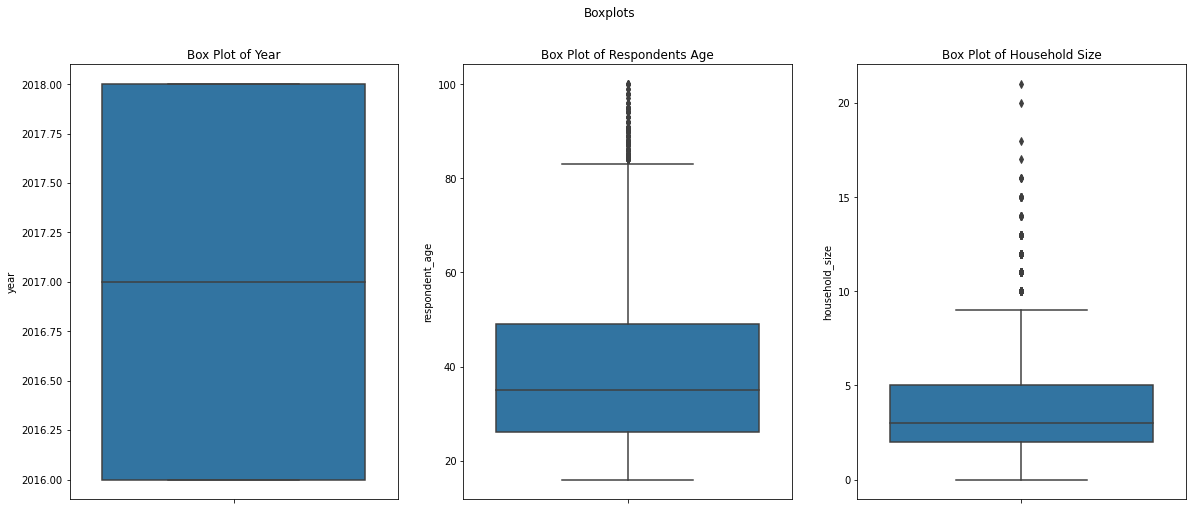

In [192]:
# Checking for Outliers

fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=finance_df, y = "year", ax=ax[0])
ax[0].set_title('Box Plot of Year')
sns.boxplot(data=finance_df, y = "respondent_age", ax=ax[1])
ax[1].set_title('Box Plot of Respondents Age')
sns.boxplot(data=finance_df, y = "household_size", ax=ax[2])
ax[2].set_title('Box Plot of Household Size')

plt.show()

The plots below show that we have no outliers in the 'year' variable,
several outliers in 'household size' variable and multiple outliers in the 'age' variable.

In [193]:
# We can identify the exact outliers in the 'respondent age'
# attributes with the function below

outliers = []

def detect_outlier(data):
  threshold=3
  mean_1=np.mean(data)
  std_1=np.std(data)

  for y in data:
    z_score=(y-mean_1)/std_1
    if np.abs(z_score)>threshold:
      outliers.append(y)
  return outliers
detect_outlier(finance_df['respondent_age'])


[95.0,
 95.0,
 95.0,
 93.0,
 90.0,
 89.0,
 95.0,
 94.0,
 95.0,
 93.0,
 90.0,
 92.0,
 92.0,
 90.0,
 90.0,
 90.0,
 91.0,
 93.0,
 95.0,
 90.0,
 89.0,
 89.0,
 95.0,
 90.0,
 89.0,
 89.0,
 89.0,
 90.0,
 95.0,
 93.0,
 92.0,
 95.0,
 94.0,
 92.0,
 95.0,
 90.0,
 95.0,
 95.0,
 89.0,
 95.0,
 98.0,
 95.0,
 97.0,
 92.0,
 89.0,
 92.0,
 89.0,
 96.0,
 89.0,
 99.0,
 89.0,
 94.0,
 91.0,
 91.0,
 90.0,
 89.0,
 89.0,
 90.0,
 95.0,
 89.0,
 90.0,
 96.0,
 100.0,
 90.0,
 90.0,
 89.0,
 98.0,
 91.0,
 92.0,
 95.0,
 89.0,
 94.0,
 99.0,
 90.0,
 90.0,
 90.0,
 90.0,
 90.0,
 100.0,
 91.0,
 90.0,
 95.0,
 94.0,
 90.0,
 98.0,
 98.0,
 100.0,
 100.0,
 90.0,
 90.0,
 100.0,
 90.0,
 90.0,
 96.0,
 90.0,
 90.0,
 98.0,
 95.0,
 98.0,
 90.0]

We can see that ages 89 - 100 are outliers.we choose to retain these outliuers since there might be people with 89 to 100 years who have access to bank accounts

In [194]:
# We can identify the exact outliers in the 'household_size'
# attributes with the function below

outliers = []

def detect_outlier(data):
  threshold=3
  mean_1=np.mean(data)
  std_1=np.std(data)

  for y in data:
    z_score=(y-mean_1)/std_1
    if np.abs(z_score)>threshold:
      outliers.append(y)
  return outliers
detect_outlier(finance_df['household_size'])

[12.0,
 16.0,
 11.0,
 12.0,
 11.0,
 11.0,
 16.0,
 11.0,
 11.0,
 15.0,
 13.0,
 11.0,
 11.0,
 11.0,
 13.0,
 12.0,
 12.0,
 12.0,
 12.0,
 11.0,
 11.0,
 11.0,
 13.0,
 13.0,
 12.0,
 12.0,
 12.0,
 11.0,
 12.0,
 13.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 13.0,
 11.0,
 11.0,
 11.0,
 11.0,
 14.0,
 21.0,
 11.0,
 14.0,
 12.0,
 15.0,
 11.0,
 15.0,
 15.0,
 13.0,
 11.0,
 11.0,
 13.0,
 12.0,
 13.0,
 11.0,
 11.0,
 11.0,
 13.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 12.0,
 12.0,
 13.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 13.0,
 14.0,
 12.0,
 12.0,
 13.0,
 13.0,
 12.0,
 12.0,
 13.0,
 12.0,
 11.0,
 15.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 13.0,
 11.0,
 11.0,
 12.0,
 12.0,
 18.0,
 12.0,
 12.0,
 12.0,
 14.0,
 12.0,
 17.0,
 11.0,
 12.0,
 12.0,
 13.0,
 13.0,
 12.0,
 12.0,
 13.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 20.0,
 12.0,
 14.0,
 15.0,
 12.0,
 12.0,
 15.0,
 11.0,
 11.0,
 12.0,
 12.0,
 12.0,
 13.0,
 11.0,

The outliers in the household size lies between 11-20.Again there is no household size limit that can access bank accounts.retaining this outliers will not affect our analysis in any way.

# **Exploratory** **Data** **Analysis**

**Univariate Analysis**

Count the number of respondents who can access bank accounts and those who can not access bank accounts(we need only analyze those that can access bank accounts):

In [195]:
print(finance_df[finance_df['has_a_bank_account'] == 'Yes']['has_a_bank_account'].count())
print(finance_df[finance_df['has_a_bank_account'] == 'No']['has_a_bank_account'].count())

3271
19909


3296 people had access to bank accounts while 20044 did not have access to bank accounts

<Axes: title={'center': 'Freq dist of bank account access'}>

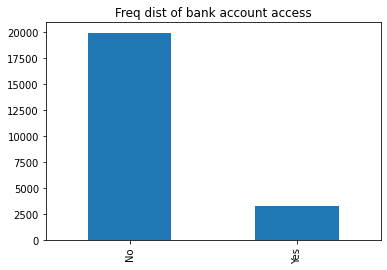

In [196]:
#Has access to bank account column is a categorical variable
#For categorical columns we plot histograms, we use the value_count() and plot.bar() functions to draw a bar plot, which is commonly used for representing categorical data using rectangular bars with value counts of the categorical values. In this case, we have two types of answers in the has a bank account column ie Yes or no. The bar plot shows comparisons among these discrete categories, with the x-axis showing the specific categories and the y-axis the measured value.
finance_df['has_a_bank_account'].value_counts().plot.bar(title='Freq dist of bank account access')

The graph cleary shows that there are more people who did not access bank accounts as compared to those who accessed bank accounts

Text(0.5, 1.0, 'Location Type')

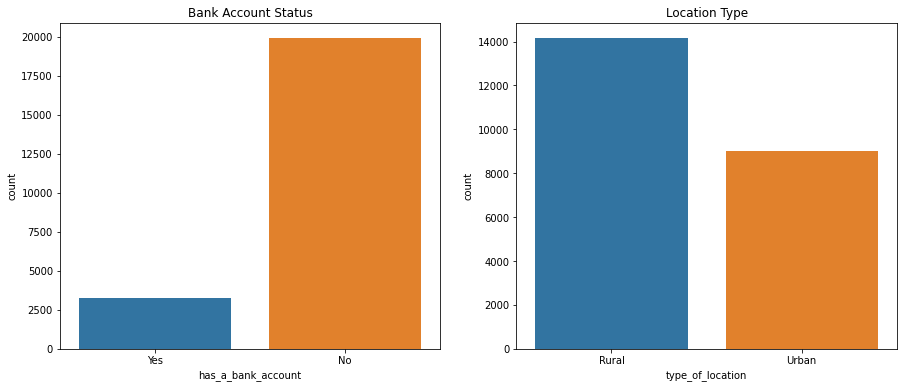

In [197]:
# We can plot various bar charts
# to help visualize other statistics
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.countplot(x=finance_df['has_a_bank_account'], ax=ax[0])
ax[0].set_title('Bank Account Status')
sns.countplot(x=finance_df['type_of_location'], ax=ax[1])
ax[1].set_title('Location Type')


Its cleary seen that individuals did not have access to bank accounts.Also most people who where involved in the study came from rural areas

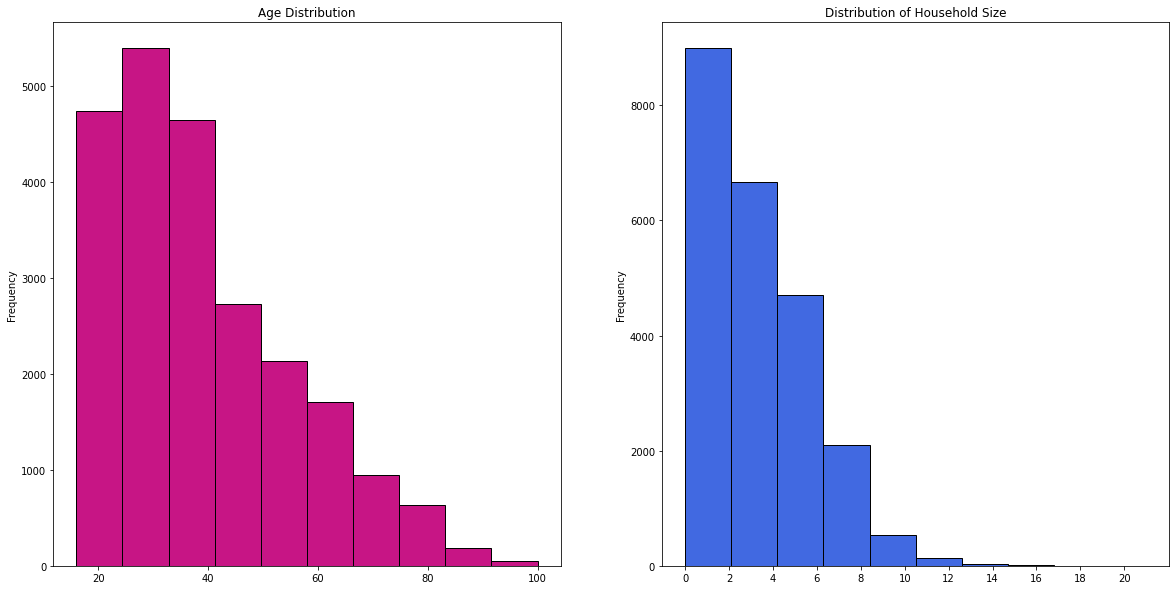

In [198]:
# Next, we can plot a histogram to show the distribution of 
# age and household size in the dataset
fig,ax=plt.subplots(1,2,figsize=(20,10))
finance_df['respondent_age'].plot.hist(ax=ax[0],edgecolor='black',color='mediumvioletred')
ax[0].set_title('Age Distribution')
x1=np.arange(0,finance_df['respondent_age'].max()+0.5,10)
plt.xticks(x1)
finance_df['household_size'].plot.hist(ax=ax[1],color='royalblue',bins=10,edgecolor='black')
ax[1].set_title('Distribution of Household Size')
x2=np.arange(0,finance_df['household_size'].max(),2)
ax[1].set_xticks(x2)
plt.show()

From above histograms there were more individuals aged between 24 and 33 as compared to those aged above 80 years.Its also noted that the number of people who participated in the survey decreased constantly with increase in years.

From the histogram showing household size, there are more families with household size of between 0-6 than between 8-18 

In [199]:
#ploting pie chats to show gender of respondent with respect to male and female and type of location-rural/urban
fig = plt.figure(figsize=(18,10), dpi=1600)
#1 rows 2 columns

#first row, first column
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(finance_df['gender_of_respondent'].value_counts(),
        labels = ['Male','Female'],startangle = 90 , autopct = '%.2f')
plt.title("Pie Chart of respondent's age")

#first row sec column
ax1 = plt.subplot2grid((1,2), (0, 1))
plt.pie(finance_df['type_of_location'].value_counts(),
        labels = ['Rural','Urban'],startangle = 180 , autopct = '%.2f')
plt.title('Pie chart showing Location Type')

plt.show()

It is noted that more men were involved in the survey as compared to females.

In [200]:
# Ploting the univariate summaries and recording our observations

# We can create a frequency table
# to show how many times each level of education exists in the dataset

finance_df.level_of_educuation.value_counts()

Primary education                  12613
No formal education                 4450
Secondary education                 4176
Tertiary education                  1141
Vocational/Specialised training      800
Name: level_of_educuation, dtype: int64

Here many people had their education level up to primary level as compared to those secondary education.there were also more tertiary education individuals as compared to those who went for vocational/specialised training

**Measures of Central Tendency**

In [201]:
# We can check the mean, mode and median of ages in the dataset
mean_age = finance_df['respondent_age'].mean()
median_age = finance_df['respondent_age'].median()
mode_age = finance_df['respondent_age'].mode()
print(mean_age, median_age, mode_age)


38.795297670405525 35.0 0    30.0
Name: respondent_age, dtype: float64


We can see that the mean age is 38, median age is 35 and mode age is 30

In [202]:
# Checking the mean, mode and median of hosehold sizes in the dataset
mean_hsize = finance_df['household_size'].mean()
median_hsize = finance_df['household_size'].median()
mode_hsize = finance_df['household_size'].mode()
print(mean_hsize, median_hsize, mode_hsize)


3.684253666954271 3.0 0    2.0
Name: household_size, dtype: float64


The mean, median and mode of household size variable are 3, 3 and 2 respectively

**Measures of Dispersion**

In [203]:
#Age
#Standard deviation
age_std = finance_df['respondent_age'].std()
print("The Respondent's age standard deviation is ",age_std)

#Variance
age_var = finance_df['respondent_age'].var()
print("The Respondent's age variance is ",age_var)


#Range
age_max = finance_df['respondent_age'].max()
age_min = finance_df['respondent_age'].min()
age_range = age_max - age_min
print('The range of the Respondent age is : ',age_range)


#Interquartile Range
#the difference between the upper quartile (75th percentile) and the lower quartile (25th percentile).
from scipy.stats import iqr
age_iqr = iqr(finance_df['respondent_age'])
print('The Interquartile Range for Respondent age variable is : ',age_iqr)


#Skewness
#Measeure of symmetry
age_skew = finance_df['respondent_age'].skew()
print('The skewness of age variable is : ',age_skew)



#Kurtosis
age_kurt = finance_df['respondent_age'].kurt()
print('The kurtosis of age variable is : ',age_kurt)




The Respondent's age standard deviation is  16.512152476456798
The Respondent's age variance is  272.65117940575834
The range of the Respondent age is :  84.0
The Interquartile Range for Respondent age variable is :  23.0
The skewness of age variable is :  0.8405337339193103
The kurtosis of age variable is :  0.09898933229337814


Skewness is positive meaning that data is skewed right. Since Kurtosis is greater than zero , we can say data is heavy tailed hence there's presence of outliers

In [204]:
#HouseHold Size
#Standard deviation
Hsize_std = finance_df['household_size'].std()
print("The Respondent's Household size standard deviation is ",Hsize_std)


#Variance
Hsize_var = finance_df['household_size'].var()
print("The Respondent's Household size variance is ",Hsize_var)


#Range
Hsize_max = finance_df['household_size'].max()
Hsize_min = finance_df['household_size'].min()
Hsize_range = Hsize_max - Hsize_min
print('The range of the Respondent Household size is : ',Hsize_range)


#Interquartile Range
#the difference between the upper quartile (75th percentile) and the lower quartile (25th percentile).
from scipy.stats import iqr
Hsize_iqr = iqr(finance_df['household_size'])
print('The Interquartile Range for Respondent Household size variable is : ',Hsize_iqr)


#Skewness
#Measeure of symmetry
Hsize_skew = finance_df['household_size'].skew()
print('The skewness of Household size variable is : ',Hsize_skew)



#Kurtosis
Hsize_kurt = finance_df['household_size'].kurt()
print('The kurtosis of Household size variable is : ',Hsize_kurt)


The Respondent's Household size standard deviation is  2.2790190444228937
The Respondent's Household size variance is  5.19392780484224
The range of the Respondent Household size is :  21.0
The Interquartile Range for Respondent Household size variable is :  3.0
The skewness of Household size variable is :  0.9733085882094353
The kurtosis of Household size variable is :  1.146311393176155


Skewness is positive meaning that data is skewed right. Since Kurtosis is greater than zero , we can say data is heavy tailed hence there's presence of outliers

**DEDUCTIONS FROM UNIVARIATE ANALYSIS**

**Numerical variables**:

Age distribution was skewed to the right. The mean age was 38 , median was 35 , mode was 30.This shows that most of our respondents were in their thirties.

The Household size distribution was skewed to the right. Mean was 3 , median was 3 and mode was 2.

**Categorical variables**:

. From the dataset, we can say that there were more males than females interviewed.

. Also, most respondents reside in the rural areas compared to urban areas.

. Most of the respondents were heads of the household and were married or living together with their spouses.

. Most of them had access to cellphones and were self employed. Most of the respondents did not have bank accounts.

**BIVARIATE ANALYSIS**

**Visual Analysis of Categorical Variables**

**Numerical-Numerical**

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


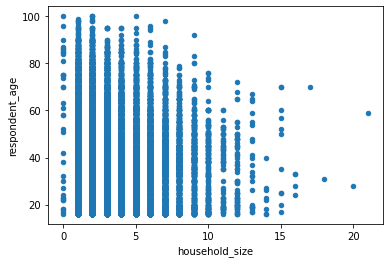

In [205]:
# for numerical-numerical  we do scatter plot and  linear correlation where scatter plot 
#The bivariate distribution plots help us to study the relationship between two variables by analyzing the scatter plot
finance_df.plot.scatter('household_size','respondent_age')
plt.show()

The scatter plot show that as the house hold size increases,the respondent age decreases

In [206]:
# Linear correlation to show the strength of the relationship between the two variables
finance_df['household_size'].corr(finance_df['respondent_age'])

-0.11850838646634444

There is  Weak negative correlation between house hold size and respondent age.This means if we increase one variable  the the 2nd variable decreases with the same amount

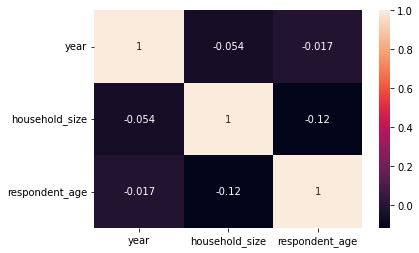

In [207]:
# Plotting the Pearson correlation coefficient among numeric variables
# We can see that the two varibles below are not correlated
# since the correlation coefficients are close to 0

sns.heatmap(finance_df.corr(),annot=True)
plt.show()

The pearson correlation coefficient shows there is correlation between the three variables

**Categorical - Categorical**

In [208]:
# We can compare various categorical variables with each other
# To begin we can check how many individuals have bank accounts, based
# on their gender and type of location

pd.crosstab([finance_df.gender_of_respondent,finance_df.has_a_bank_account]
            ,finance_df.type_of_location,margins=True).style.background_gradient(cmap='Pastel1_r')


We see that generally, more men have bank accounts compared to women.It also shows that females who live in urban areas are more likely to have bank accounts relative to those who live in rural areas. The opposite is true for males

In [209]:
# We can also check how many individuals have bank accounts, based
# on their marital status and also their phone ownership status

pd.crosstab([finance_df.cell_phone_access,finance_df.has_a_bank_account]
            ,finance_df.marital_status,margins=True).style.background_gradient(cmap='Pastel1_r')

We see that generally, individuals who have cell phones are likely to have have bank accounts compared to those who don't have cell phones.

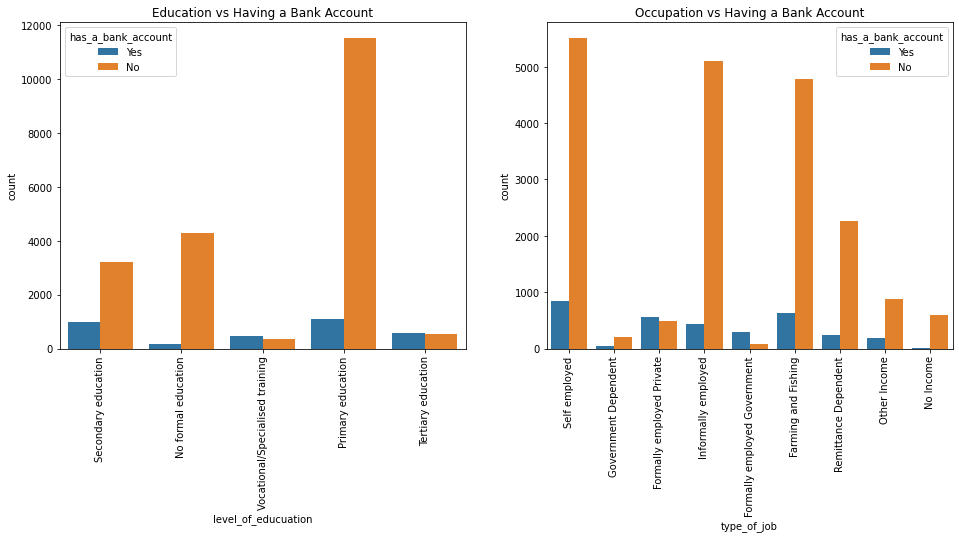

In [210]:
# Comparing education level and occupation vs having a bank account
fig,ax=plt.subplots(1,2,figsize=(16,6))

sns.countplot(x='level_of_educuation', hue='has_a_bank_account', data=finance_df, ax=ax[0])
ax[0].set_title('Education vs Having a Bank Account')

sns.countplot(x='type_of_job', hue='has_a_bank_account', data=finance_df, ax=ax[1])
ax[1].set_title('Occupation vs Having a Bank Account')

for axi in fig.axes:
    plt.sca(axi)
    plt.xticks(rotation=90)
plt.show()


it is seen that level of education mattered alot as far as having bank account is concerned.Those who had primary and secondary education have more access to bank accounts.The self employed also had more access to bank accounts as compared to other types of job

**Bivariate analysis findings**

**Numerical:**

Younger people had bank accounts compared to the elder people Household with less people had bank accounts.

There was a very small correlation between the household size and one owning a bank account. There was a very small correlation between the household size and one owning a bank account.

**Categorical:**

Repondents who were head of their households, Most of them had no bank accounts. Among those with bank accounts, they were also the most. This may be because they were the majority in that demograph.

Respondents who were married were the majority among those with bank accounts and also those without.

We noted that a majority of respondents with only a Primary level of education had no bank accounts. However respondents with any form of education, e.g secondary, vocational , tertiary, most of them had bank accounts.

Most respondents had access to cellphones and yet did not have bank accounts.

Most respondents who were female did not have bank accounts.

Problems and Recommendations

Our data is highly imbalanced. It leans more towards certain demographics than others.

Also our data is collected from different years for different countries hence may result to some minor inaccuracies.

**MULTIVARIATE ANALYSIS**

We will use Principal Component Analysis (PCA) to select the most important features in the dataset that tell us the maximum amount of information about the dataset.We will use Principal Component Analysis (PCA) to select the most important features in the dataset that tell us the maximum amount of information about the dataset.(PCA) which would decompose a data table with correlated measures into a new set of uncorrelated measures.

First PCA deals with numerical data only so we cave to convert our categorical data to numerical

In [211]:
print(finance_df['country'].value_counts())

Rwanda      8610
Tanzania    6497
Kenya       6051
Uganda      2022
Name: country, dtype: int64


In [212]:
#drop uniqueid column- not important
finance_df.drop(['uniqueid'], axis=1, inplace = True)

In [213]:
finance_df.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [214]:
# We need to change some categorical attributes to numeric since pca works with numerical data

encode = {"country":{"Rwanda":0, "Tanzania":1, "Kenya":2, "Uganda":3},
        "has_a_bank_account": {"Yes":1, "No":0}, "gender_of_respondent": {"Male":1, "Female":0},
          "cell_phone_access":{"Yes":1,"No":0}, "type_of_location": {"Rural":1, "Urban":0},
          "level_of_educuation":{"No formal education":0,"Primary education":1, "Secondary education":2,
                              "Vocational/Specialised training":3,"Tertiary education":4, "Other/Dont know/RTA":5},
          "the_relathip_with_head":{"Head of Household":0, "Child":1, "Parent":2,
                            "Spouse":3, "Other relative":4, "Other non-relatives":5}, 
          "type_of_job":{"Self employed":0,"Informally employed":1,"Farming and Fishing":2,"Remittance Dependent":3,"Other Income":4,"Formally employed Private":5,"No Income":6,"Formally employed Government":7,"Government Dependent":8,"Dont Know/Refuse to answer":9},
          "marital_status":{"Married/Living together":0, "Single/Never Married":1, "Divorced/Seperated":2,
                            "Widowed":3, "Dont know":4}}


In [215]:
finance_df.replace(encode, inplace = True)
finance_df


,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,2,2018,1,1,1,3.0,24.0,0,3,0,2,0
1,2,2018,0,1,0,5.0,70.0,0,0,3,0,8
2,2,2018,1,0,1,5.0,26.0,1,4,1,3,0
3,2,2018,0,1,1,5.0,34.0,0,0,0,1,5
4,2,2018,0,0,0,8.0,26.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2018,0,1,1,4.0,48.0,0,0,2,0,4
23520,3,2018,0,1,1,2.0,27.0,0,0,1,2,4
23521,3,2018,0,1,1,5.0,27.0,0,2,3,1,4
23522,3,2018,0,0,1,7.0,30.0,0,2,2,2,0


We also neet to check whether the variables are correlated in any way since pca reduces the correlated features to uncorrelated ones ie principle components



In [216]:
finance_df.corr()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
country,1.000000,0.964294,0.083914,-0.165499,-0.067256,0.004593,-0.032367,-0.013002,0.018305,-0.035684,0.143992,0.072896
year,0.964294,1.000000,0.113797,-0.215748,-0.067280,-0.053875,-0.017160,-0.000266,-0.000505,-0.016402,0.164725,0.065996
has_a_bank_account,0.083914,0.113797,1.000000,-0.087568,0.209147,-0.021978,0.019262,0.115955,-0.093853,-0.084019,0.363332,0.185180
type_of_location,-0.165499,-0.215748,-0.087568,1.000000,0.085316,0.274927,0.047733,-0.013654,-0.006727,-0.091777,-0.133244,0.062187
cell_phone_access,-0.067256,-0.067280,0.209147,0.085316,1.000000,0.098603,-0.103826,0.102694,-0.050268,-0.168443,0.238407,0.017145
household_size,0.004593,-0.053875,-0.021978,0.274927,0.098603,1.000000,-0.118508,0.010518,0.167281,-0.309176,-0.030133,0.031543
respondent_age,-0.032367,-0.017160,0.019262,0.047733,-0.103826,-0.118508,1.000000,0.013048,-0.310194,0.234537,-0.310311,0.021602
gender_of_respondent,-0.013002,-0.000266,0.115955,-0.013654,0.102694,0.010518,0.013048,1.000000,-0.450052,-0.167035,0.107821,-0.056806
the_relathip_with_head,0.018305,-0.000505,-0.093853,-0.006727,-0.050268,0.167281,-0.310194,-0.450052,1.000000,-0.243602,0.042034,0.031444
marital_status,-0.035684,-0.016402,-0.084019,-0.091777,-0.168443,-0.309176,0.234537,-0.167035,-0.243602,1.000000,-0.092099,0.036876


Correlation coefficients between -.20 and .20 are generally considered to be weak correlated and therefore from the output of .corr() all the variables are correlated and we therefore decide to do PCA inorder to come up with uncorrelated features

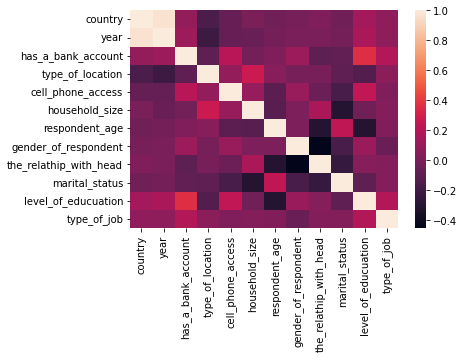

In [232]:
#Checking Co-relation between features after PCA
sns.heatmap(finance_df.corr());

We see that gender of respondent and the relationship with the head are  highly correlated.The variables also have weak correlation with the access to bank accounts

In [218]:
#next Import necessary libraries
from sklearn import datasets  # to retrieve the finance_df Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [219]:
# Preprocessing

# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# We can store the feature sets into the X variable 
# and the series of corresponding labels in to the y variable

x = finance_df.drop('has_a_bank_account',1)
y = finance_df['has_a_bank_account']

<ipython-input-219-ab0d4f89684b>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = finance_df.drop('has_a_bank_account',1)


In [220]:
# Checking the x variable

x.shape


(23180, 11)

In [221]:
# Checking the y variable

y.shape

(23180,)

In [222]:
# we now Split the dataset into the Training set and Test set
# lets define the size of the test data as 20% of entire dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [223]:
#Normalization
 
# We will perform standard scalar normalization to normalize our feature set

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Applying PCA**

In [224]:
#PCA can be considered as an unsupervised machine learning technique.
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# Let's take a look at the following code. In the code below, we create a PCA object named pca. 
# We did not specify the number of components in the constructor. 
# Hence, all of the features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [225]:
# Explained Variance Ratio

# we need to check the variance caused by each of the principal components using
# the explained variance ratio

explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.193085  , 0.1679285 , 0.1369133 , 0.11471202, 0.10118506,
       0.07745056, 0.0657599 , 0.05689932, 0.04860396, 0.03445348,
       0.0030089 ])

The result above shows that the first principal component is responsible for 19.30% variance.The 2nd principal component causes 16.79% variance in the dataset.The third principle component is 13.69% and the forth component is 11.47%.Summation of 1st to 4th principle components ie (19.30 + 16.79+13.69+11.47) gives 61.25% .Therefore 61.25% of the classification information contained in the feature set is captured by the first 4 principal components.

In [226]:
# Using the 1 Principal Component to train algorithm

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [227]:
# Training and Making Predictions using random forest classification

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [228]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3994    0]
 [ 642    0]]
Accuracy 0.8615185504745471


With 1 feature, the random forest algorithm is able to correctly predict an 86.15% accuracy

In [229]:
# Using 2 Principal Components to train algorithm
# and make predictions using random forest classification

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3994    0]
 [ 642    0]]
Accuracy 0.8615185504745471


The same With 2 feature, the random forest algorithm is able to correctly predict an 86.15% accuracy

In [230]:
# Using 3 Principal Components to train algorithm
# and make predictions using random forest classification

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

pca = PCA(n_components=3)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3994    0]
 [ 642    0]]
Accuracy 0.8615185504745471


The 3rd one has already given an accuracy of 86.15% same as the 1 and 2 components

In [231]:
# Using the 8 Principal Components to train algorithm
# and make predictions using random forest classification

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

pca = PCA(n_components=8)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3994    0]
 [ 642    0]]
Accuracy 0.8615185504745471


The accuracy of the 8 components is also 86.15%,this shows that all the 8 features are of equal importance to the analysis of the people who have bank accounts

# **Conclusion** **and** **Recommendations**
1. people with mobile phone access are very likely to have bank accounts.Banks can therefore utilize mobile banking capabilities to reach more people.

2. There is no big difference between people living in rural vs urban areas as far as having a bank account is concerned.

3. Individuals with Formal and Government jobs are more likely to have bank accounts.

4. Banks and Financial institutions should sensitize on the importance of phone access.

5. Financial institutions should set up more banking services etc in rural areas.